In [42]:
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 7]

def above_or_below():
    if random.random() >= 0.5:
        return 1
    else:
        return -1
    
def org_data(m = 2, b = 0, k = 1, s = 10000):
    x = np.linspace(-25,25,s)
    y = m * (x ** k) + b
    return x, y
    

def Generate_Synthethic_Data(m = 2, b = 0, k = 1, s = 10000, random_samples = 500, lvl_noise = 7500):
    
    x, y = org_data(m, b, k, s)

    new_y = np.zeros(random_samples)
    new_x = np.zeros(random_samples)

    for elm in range(0,random_samples):
        # select a random x position
        r = random.randrange(len(x))
        # calculate noise value
        noise = random.uniform(0,lvl_noise)
        # calcualte above or below
        mul = above_or_below()
        # calculate new Y
        new_y[elm] = y[r] + (noise * mul)
        new_x[elm] = x[r]

    # Sort Samples
    np.sort(new_y)
    
    print('\nk = ' + str(k) + '\n')

    plt.plot(x, y, '-g', label = 'y = m* x^k + b')
    plt.plot(new_x, new_y, '.', label= 'y = m * x^k + b')
    plt.title('Graph of y = m * x^k + b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    
    return new_x, new_y


k = 1



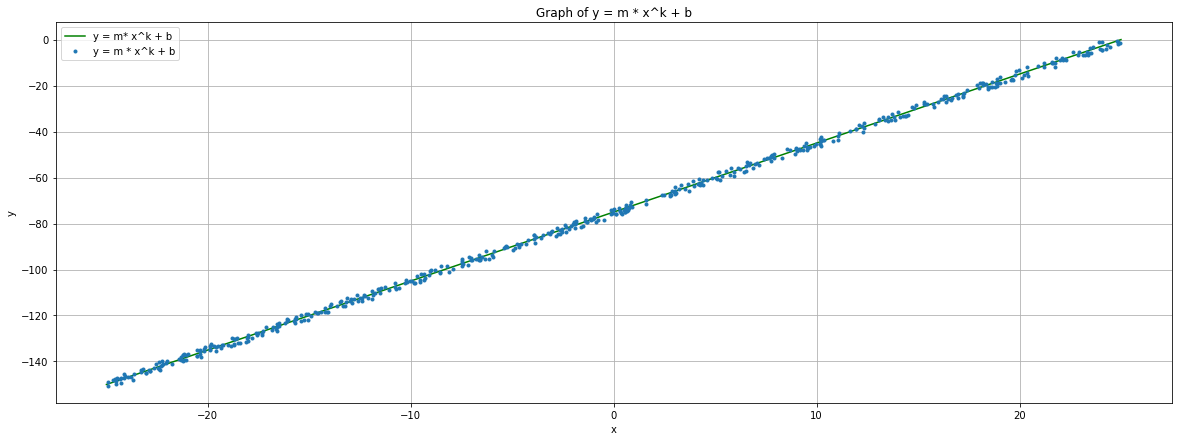


k = 1



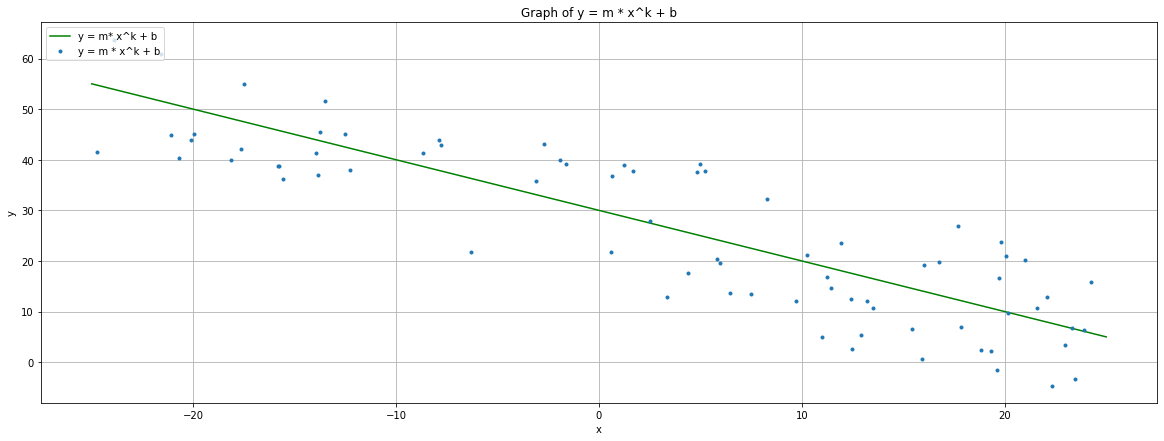


k = 2



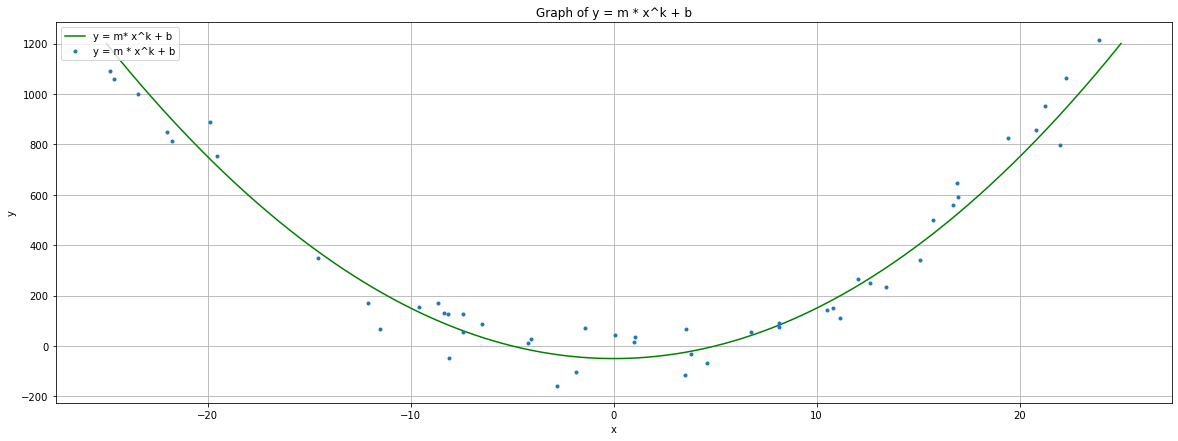


k = 3



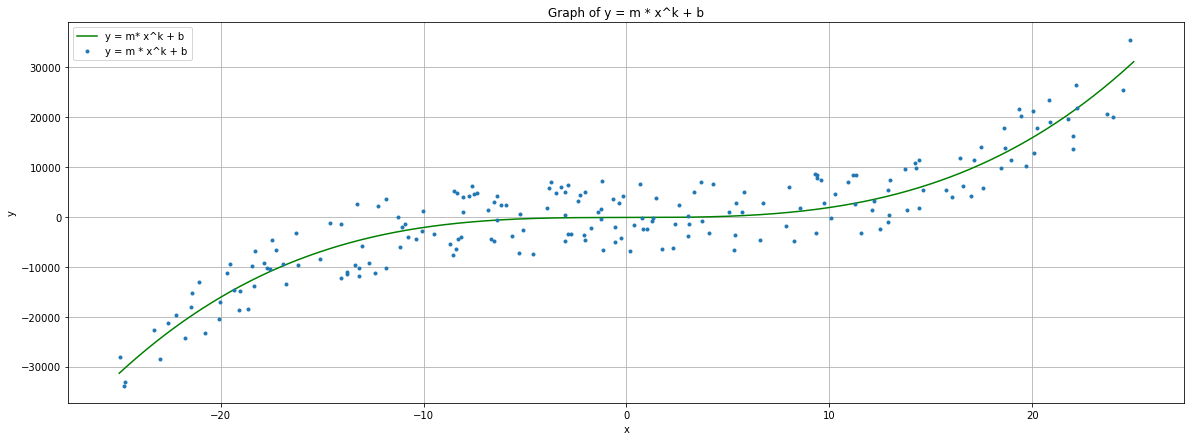

In [70]:
x1, y1 = Generate_Synthethic_Data(m = 3, b = -75, k = 1, s = 10000, random_samples = 500, lvl_noise = 2)
x2, y2 = Generate_Synthethic_Data(m = -1, b = 30, k = 1, s = 10000, random_samples = 75, lvl_noise = 15)
x3, y3 = Generate_Synthethic_Data(m = 2, b = -50, k = 2, s = 10000, random_samples = 50, lvl_noise = 150)
x4, y5 = Generate_Synthethic_Data(m = 2, b = -100, k = 3, s = 10000, random_samples = 200, lvl_noise = 7500)

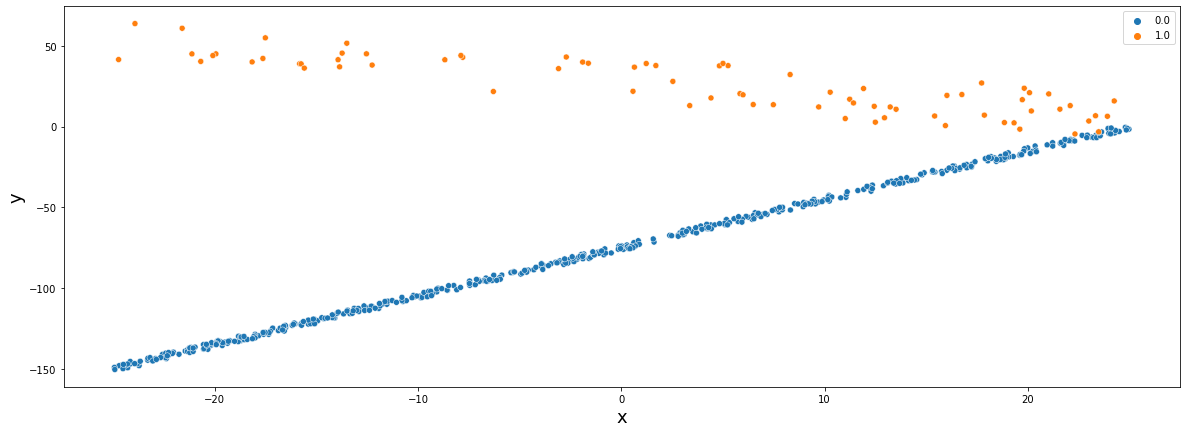

In [79]:
# Generate first regression class
res1 = np.zeros(len(x1))
param1 = np.column_stack((x1,y1))

# Generate second regression class
res2 = np.ones(len(x2))
param2 = np.column_stack((x2,y2))

# Stack results and parameters

res_t = np.concatenate((res1,res2), axis=0)
param_t = np.concatenate((param1,param2),axis=0)

# Plotting Data
sns.scatterplot(x=param_t[:,0],y=param_t[:,1],hue=res_t, ci=None)
plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.show()

In [77]:
# Apply Synthetic datas Generation 

from imblearn.over_sampling import SMOTE, ADASYN

x_res1, y_res1 = SMOTE().fit_sample(param_t, res_t)
x_res2, y_res2 = ADASYN(ratio='minority').fit_sample(param_t, res_t)

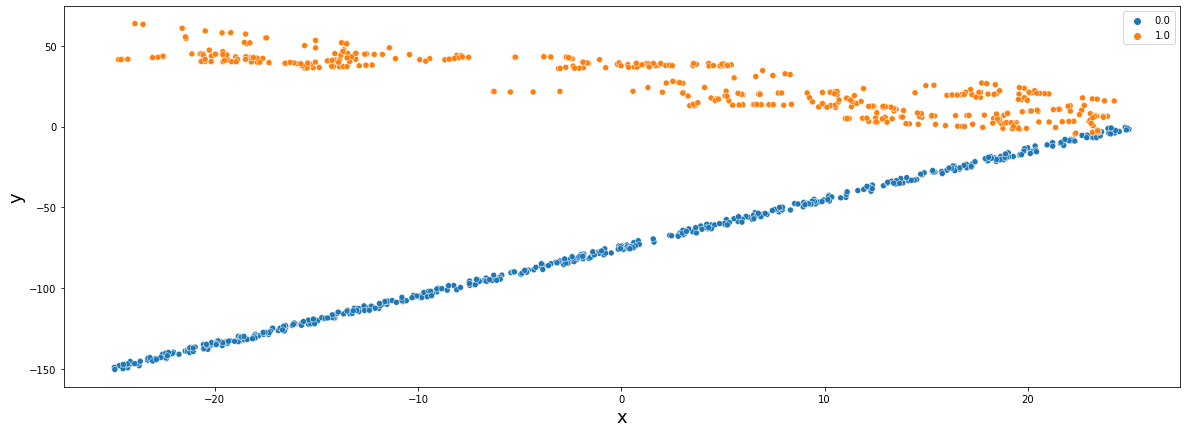

In [76]:
# Plotting Data
sns.scatterplot(x=x_res1[:,0],y=x_res1[:,1],hue=y_res1, ci=None)
plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.show()

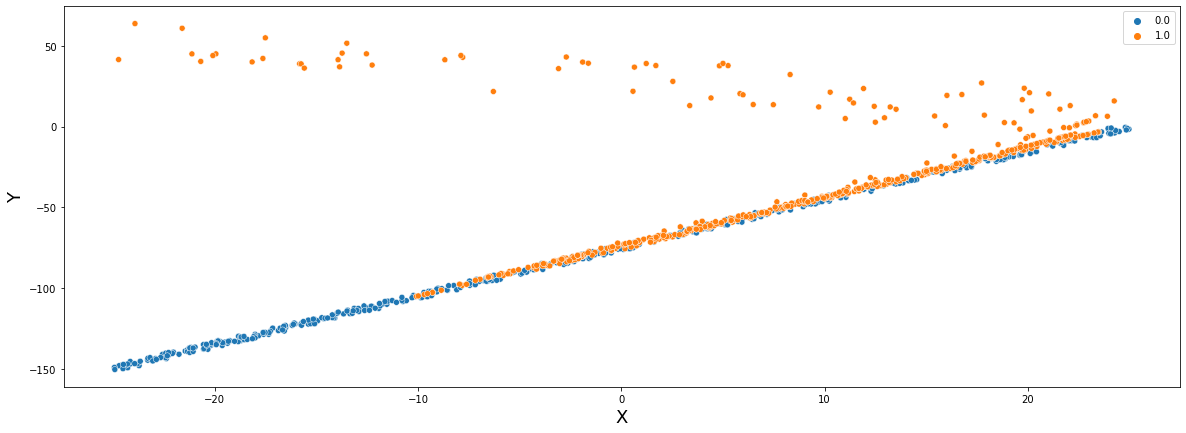

In [80]:
# Plotting Data
sns.scatterplot(x=x_res2[:,0],y=x_res2[:,1],hue=y_res2, ci=None)
plt.xlabel("X",fontsize=18)
plt.ylabel("Y",fontsize=18)
plt.show()